<a href="https://colab.research.google.com/github/alessaag/Exploraci-n-y-Visualizaci-n-de-Datos/blob/main/PreprocesamientoDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Código para cargar y mostrar información básica del dataset
import pandas as pd

#Cargar el dataset
gtd = pd.read_csv('/content/gtd_modificado.csv', low_memory=False)

#Mostrar información básica del dataset
gtd.info()
gtd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18479 entries, 0 to 18478
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           18479 non-null  int64  
 1   iyear             18479 non-null  int64  
 2   imonth            18479 non-null  int64  
 3   iday              18479 non-null  int64  
 4   extended          18479 non-null  int64  
 5   country           18479 non-null  int64  
 6   country_txt       18479 non-null  object 
 7   region            18479 non-null  int64  
 8   region_txt        18479 non-null  object 
 9   provstate         18395 non-null  object 
 10  city              18479 non-null  object 
 11  latitude          17767 non-null  float64
 12  longitude         17767 non-null  float64
 13  specificity       18479 non-null  float64
 14  vicinity          18479 non-null  int64  
 15  summary           954 non-null    object 
 16  crit1             18479 non-null  int64 

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0.0,0.0,0.0,0.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0.0,1.0,1.0,1.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9.0,-9.0,1.0,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9.0,-9.0,1.0,1.0
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9.0,-9.0,1.0,1.0


## Codificación de variables categóricas

**One-hot encoding:** Genera una columna binaria (0 o 1) para cada categoría única de una variable.
**Label encoding:** Asigna un número entero a cada categoría única.


In [4]:
#One-hot encoding para la columna 'region_txt'

gtd = pd.get_dummies(gtd, columns=['region_txt'], prefix=['region'])
gtd.head()


,eventid,iyear,imonth,iday,extended,country,country_txt,region,provstate,city,...,region_Central America & Caribbean,region_East Asia,region_Eastern Europe,region_Middle East & North Africa,region_North America,region_South America,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
0,197000000001,1970,7,2,0,58,Dominican Republic,2,NaN,Santo Domingo,...,True,False,False,False,False,False,False,False,False,False
1,197000000002,1970,0,0,0,130,Mexico,1,Federal,Mexico city,...,False,False,False,False,True,False,False,False,False,False
2,197001000001,1970,1,0,0,160,Philippines,5,Tarlac,Unknown,...,False,False,False,False,False,False,False,True,False,False
3,197001000002,1970,1,0,0,78,Greece,8,Attica,Athens,...,False,False,False,False,False,False,False,False,False,True
4,197001000003,1970,1,0,0,101,Japan,4,Fukouka,Fukouka,...,False,True,False,False,False,False,False,False,False,False


In [5]:
from sklearn.preprocessing import LabelEncoder

#Label encoding para la columna 'attacktype1_txt'

le = LabelEncoder()
gtd['attacktype1_txt'] = le.fit_transform(gtd['attacktype1_txt'])
gtd[['attacktype1_txt']].head(10)

,attacktype1_txt
0,1
1,6
2,1
3,2
4,3
5,0
6,1
7,2
8,3
9,3


# Demostración de escalado y normalización de datos numéricos

In [6]:
#StandardScaler

gtd[['nkill', 'nwound','property']]

,nkill,nwound,property
0,1.0,0.0,0
1,0.0,0.0,0
2,1.0,0.0,0
3,NaN,0.0,1
4,NaN,0.0,1
...,...,...,...
18474,0.0,0.0,1
18475,2.0,1.0,1
18476,0.0,0.0,0
18477,17.0,0.0,0


In [7]:
from sklearn.preprocessing import StandardScaler

#Selección de las columnas numéricas a estandarizar
clos_to_scale = ['nkill', 'nwound']
scaler = StandardScaler()

#Se aplica el escalado
gtd[clos_to_scale] = scaler.fit_transform(gtd[clos_to_scale])

#Se revisa el resultado
gtd[clos_to_scale].describe()


,nkill,nwound
count,1.512600e+04,1.847900e+04
mean,-2.254796e-17,-9.997354e-18
std,1.000033e+00,1.000027e+00
min,-2.209711e-01,-1.195339e-01
25%,-2.209711e-01,-1.195339e-01
50%,-2.209711e-01,-1.195339e-01
75%,-7.994121e-02,-1.195339e-01
max,5.929366e+01,8.054231e+01


Escalado Min-Max

In [9]:
gtd[['longitude','latitude']]

,longitude,latitude
0,-69.951164,18.456792
1,-99.086624,19.371887
2,120.599741,15.478598
3,23.762728,37.997490
4,130.396361,33.580412
...,...,...
18474,-6.357965,54.888585
18475,91.763931,26.149794
18476,-72.135729,2.892060
18477,-72.659444,-15.816944


In [10]:
from sklearn.preprocessing import MinMaxScaler

#Selección de las columnas numéricas a normalizar
cols_to_normalize = ['longitude','latitude']
min_max_scaler = MinMaxScaler()

#Se aplica la normalización
gtd[cols_to_normalize] = min_max_scaler.fit_transform(gtd[cols_to_normalize])

#Se revisa el resultado
gtd[cols_to_normalize].describe()

,longitude,latitude
count,17767.000000,17767.000000
mean,0.999941,0.653624
std,0.007502,0.203470
min,0.000000,0.000000
25%,0.999997,0.538010
50%,0.999998,0.720437
75%,0.999998,0.804756
max,1.000000,1.000000


# Detección y Tratamiento de Outliers

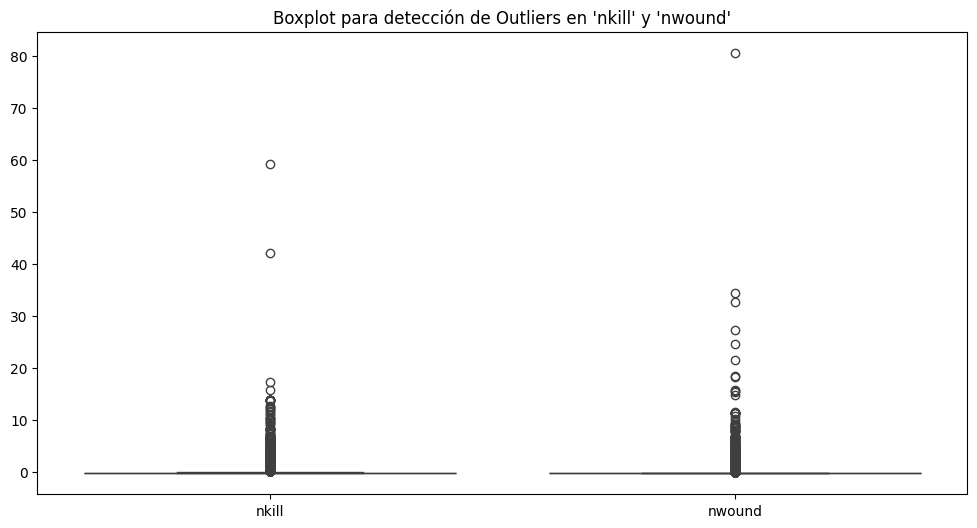

Cantidad de Outliers encontrados:
nkill     1638
nwound    2718
dtype: int64


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Se identificarán outliers de las columnas 'nkill' y 'nwound'
cols_to_check = ['nkill', 'nwound']

#Boxplot para visualización
plt.figure(figsize=(12, 6))
sns.boxplot(data=gtd[cols_to_check])
plt.title("Boxplot para detección de Outliers en 'nkill' y 'nwound'")
plt.show()

#Cálculo de outliers usando IQR

Q1 = gtd[cols_to_check].quantile(0.25)
Q3 = gtd[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

outliers = ((gtd[cols_to_check] < (Q1 - 1.5 * IQR)) | (gtd[cols_to_check] > (Q3 + 1.5 * IQR)))

print("Cantidad de Outliers encontrados:")
print(outliers.sum()) #Total de outliers en cada columna

In [14]:
#Eliminación de outliers en 'nkill' y 'kwound' usand IQR

gtd_filtered = gtd[~((gtd[cols_to_check] < (Q1 - 1.5 * IQR)) | (gtd[cols_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Tamaño del dataset original:", gtd.shape)
print("Tamaño del dataset filtrado:", gtd_filtered.shape)


Tamaño del dataset original: (18479, 68)
Tamaño del dataset filtrado: (14558, 68)


In [16]:
gtd_filtered[['nkill','nwound']]
gtd_filtered.describe

<bound method NDFrame.describe of             eventid  iyear  imonth  iday  extended  country  \
0      197000000001   1970       7     2         0       58   
1      197000000002   1970       0     0         0      130   
2      197001000001   1970       1     0         0      160   
3      197001000002   1970       1     0         0       78   
4      197001000003   1970       1     0         0      101   
...             ...    ...     ...   ...       ...      ...   
18470  198304050004   1983       4     5         0       95   
18471  198304060001   1983       4     6         0       11   
18472  198304060002   1983       4     6         0      110   
18474  198304060004   1983       4     6         0      603   
18476  198304070002   1983       4     7         0       45   

              country_txt  region         provstate           city  ...  \
0      Dominican Republic       2               NaN  Santo Domingo  ...   
1                  Mexico       1           Federal    Mexico city  ...   
2             Philippines       5            Tarlac        Unknown  ...   
3                  Greece       8            Attica         Athens  ...   
4                   Japan       4           Fukouka        Fukouka  ...   
...                   ...     ...               ...            ...  ...   
18470                Iraq      10           Baghdad        Baghdad  ...   
18471           Argentina       3      Buenos Aires   Buenos Aires  ...   
18472             Lebanon      10             South          Sidon  ...   
18474      United Kingdom       8  Northern Ireland    Cullybackey  ...   
18476            Colombia       3              Meta      Mapiripan  ...   

       region_Central America & Caribbean  region_East Asia  \
0                                    True             False   
1                                   False             False   
2                                   False             False   
3                                   False             False   
4                                   False              True   
...                                   ...               ...   
18470                               False             False   
18471                               False             False   
18472                               False             False   
18474                               False             False   
18476                               False             False   

       region_Eastern Europe  region_Middle East & North Africa  \
0                      False                              False   
1                      False                              False   
2                      False                              False   
3                      False                              False   
4                      False                              False   
...                      ...                                ...   
18470                  False                               True   
18471                  False                              False   
18472                  False                               True   
18474                  False                              False   
18476                  False                              False   

      region_North America  region_South America  region_South Asia  \
0                    False                 False              False   
1                     True                 False              False   
2                    False                 False              False   
3                    False                 False              False   
4                    False                 False              False   
...                    ...                   ...                ...   
18470                False                 False              False   
18471                False                  True              False   
18472                False                 False              False   
18474                False          

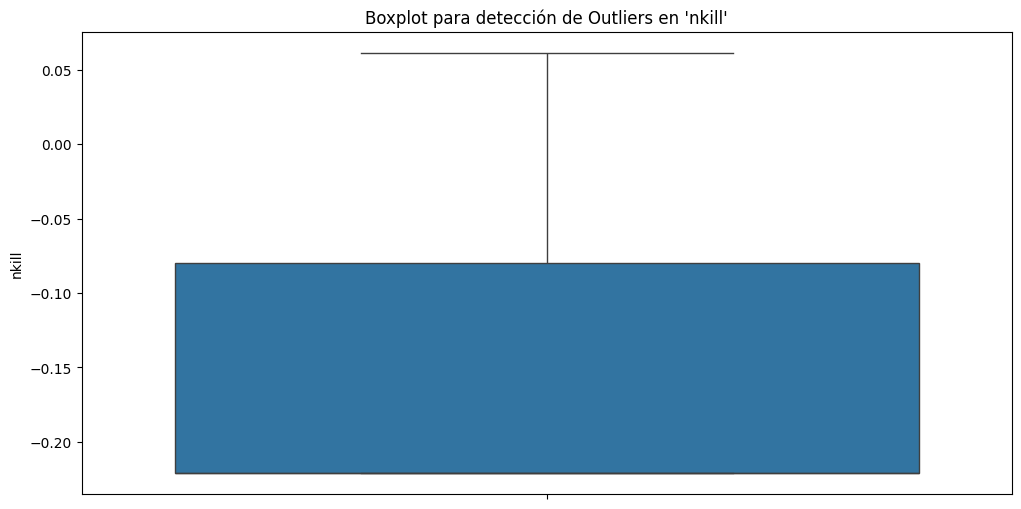

In [18]:
#Ejemplo de imputación con median en la columna 'nkill'

gtd['nkill'] = np.where(outliers['nkill'], gtd['nkill'].median(), gtd['nkill'])
gtd['nkill'].describe()

#Boxplot para visualización

plt.figure(figsize=(12, 6))
sns.boxplot(gtd['nkill'])
plt.title("Boxplot para detección de Outliers en 'nkill'")
plt.show()


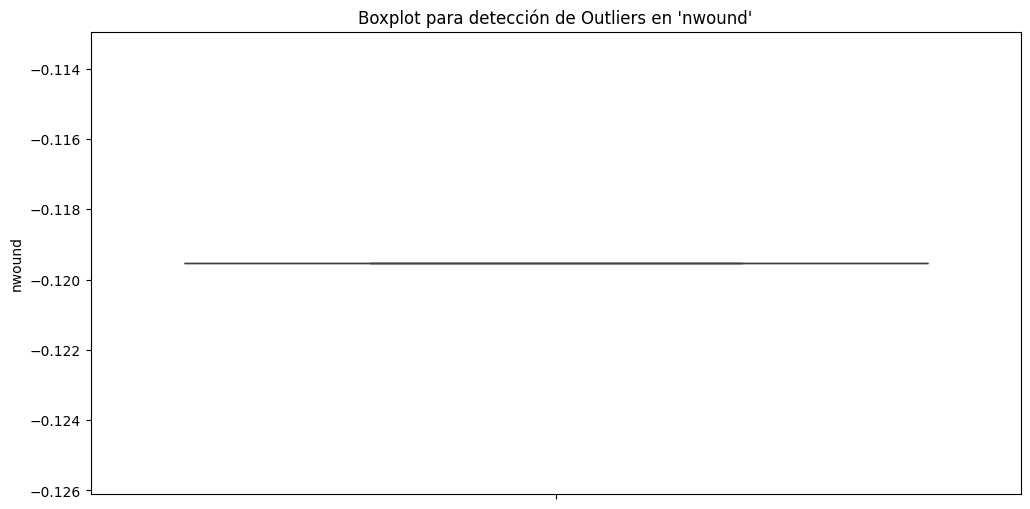

In [19]:
#Ejemplo de imputación con median en la columna 'nwound'

gtd['nwound'] = np.where(outliers['nwound'], gtd['nwound'].median(), gtd['nwound'])
gtd['nwound'].describe()

#Boxplot para visualización

plt.figure(figsize=(12, 6))
sns.boxplot(gtd['nwound'])
plt.title("Boxplot para detección de Outliers en 'nwound'")
plt.show()

In [21]:
# Guardar el DataFrame modificado como un archivo csv

gtd.to_csv('gtd_modificado_final.csv', index=False)

In [22]:
# Código para cargar y mostrar información básica del dataset
import pandas as pd

# Cargar el dataset
gtd2 = pd.read_csv('/content/gtd_modificado_final.csv', low_memory=False)

# Mostrar información básica del dataset
gtd.info()
gtd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18479 entries, 0 to 18478
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   eventid                             18479 non-null  int64  
 1   iyear                               18479 non-null  int64  
 2   imonth                              18479 non-null  int64  
 3   iday                                18479 non-null  int64  
 4   extended                            18479 non-null  int64  
 5   country                             18479 non-null  int64  
 6   country_txt                         18479 non-null  object 
 7   region                              18479 non-null  int64  
 8   provstate                           18395 non-null  object 
 9   city                                18479 non-null  object 
 10  latitude                            17767 non-null  float64
 11  longitude                           17767

,eventid,iyear,imonth,iday,extended,country,country_txt,region,provstate,city,...,region_Central America & Caribbean,region_East Asia,region_Eastern Europe,region_Middle East & North Africa,region_North America,region_South America,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
0,197000000001,1970,7,2,0,58,Dominican Republic,2,NaN,Santo Domingo,...,True,False,False,False,False,False,False,False,False,False
1,197000000002,1970,0,0,0,130,Mexico,1,Federal,Mexico city,...,False,False,False,False,True,False,False,False,False,False
2,197001000001,1970,1,0,0,160,Philippines,5,Tarlac,Unknown,...,False,False,False,False,False,False,False,True,False,False
3,197001000002,1970,1,0,0,78,Greece,8,Attica,Athens,...,False,False,False,False,False,False,False,False,False,True
4,197001000003,1970,1,0,0,101,Japan,4,Fukouka,Fukouka,...,False,True,False,False,False,False,False,False,False,False


Diagrama de dispersión de las columnas 'nkill' y 'nwound'